## Create a straight-line dataset

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

device = "cuda" if torch.cuda.is_available() else "cpu"

In [15]:
# Creating a straight-line dataset

weight, bias = 0.3, 0.9

start = 0
end = 1 
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Split dataset into train and test sets

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [31]:
# Plot Dataset

def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
        plt.figure(figsize=(10,7))
        plt.scatter(train_data, train_labels, s=4, c="b", label="Training Data")
        plt.scatter(test_data, test_labels, s=4, c="g", label="Test Data")

        if predictions is not None:
            plt.scatter(test_data, predictions, s=4, c="r", label="Predictions")

        plt.legend(prop={"size": 14})


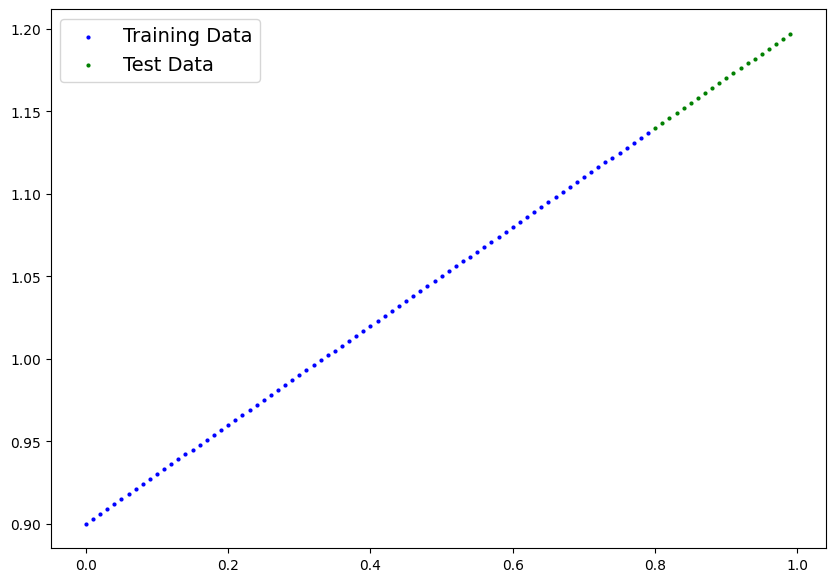

In [19]:
plot_prediction()

In [35]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
        
torch.manual_seed(42)

model_1 = LinearRegressionModel()
model_1, model_1.state_dict()


(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [1]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

torch.manual_seed(42)

epochs = 200

X_train, y_train = X_train.to(device), y_train.to(device)

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

plot_prediction(predictions=test_pred)



NameError: name 'nn' is not defined